The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler


(-8.0, 8.0, -8.0, 8.0)

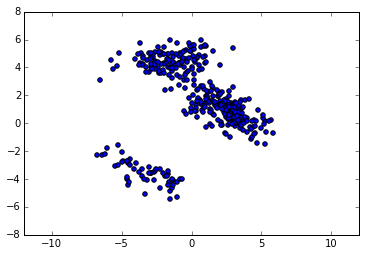

In [17]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%load_ext line_profiler
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from scipy import stats
from sklearn.utils import check_array, check_random_state
from sklearn.datasets.samples_generator import make_spd_matrix
from sklearn import cluster
from sklearn import preprocessing
import warnings
import itertools
from matplotlib import animation
import matplotlib as mpl
warnings.filterwarnings('always')

from sklearn.mixture import GMM as gmm
from sklearn.mixture import GaussianMixture as gm
from sklearn.mixture.bayesianmixture import BayesianGaussianMixture as bgmm
from sklearn.mixture import DirichletProcessGaussianMixture as dpgm

rng = np.random.RandomState(42)
n_samples = 400
n_features = 2
n_components = 3

c = 0
means = [rng.uniform(-1, 1, n_features) * 5 for _ in range(n_components)]
covars = [make_spd_matrix(n_features, rng) for _ in range(n_components)]
weights = rng.rand(n_components)
weights = weights / np.sum(weights)

n_samples_components = np.round(weights * n_samples).astype(int)
X = np.vstack([rng.multivariate_normal(means[j], covars[j], np.round(weights[j] * n_samples).astype(int))
               for j in range(n_components)])
    
plt.scatter(X[:,0], X[:,1])
plt.axis('equal')

1 -12.486896446
60 -0.00632950340446
61 -0.00319855377188
62 -0.00165214031676
63 -0.000856146590877
64 -0.000443700473625
65 -0.000229892492598
66 -0.000119091819215
67 -6.16872230239e-05


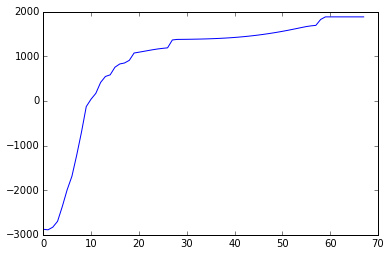

In [25]:
bg = bgmm(n_init=1, n_iter=100, tol=1e-4, n_components=20, verbose=200, init_params='kmeans',
         precision_type='full', alpha_prior=1e-2)
bg.fit(X)
plt.plot([x[3] for x in bg._log_snapshot])

45 -0.00205259857489
46 -0.000884638008984
47 -0.000440362284053
48 -0.00022637219945
49 -0.000117097132943
50 -6.06385656283e-05


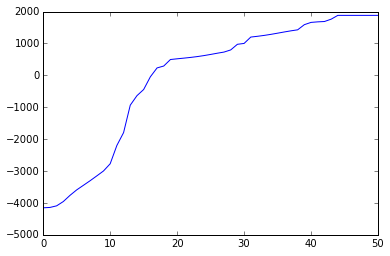

In [26]:
bg = bgmm(n_init=1, n_iter=100, tol=1e-4, n_components=20, verbose=200, init_params='random',
         precision_type='full', alpha_prior=1e-2)
bg.fit(X)
plt.plot([x[3] for x in bg._log_snapshot])

1 -31.8668936114
2 -19.4983205995
3 -12.5970513592
4 -8.69609934409
5 -6.27884256701
6 -4.6471657758
7 -3.45838568105
8 -2.53185344571
9 -1.76574395696
10 -1.09865616653
11 -0.490925977259
41 -0.0151999828504
42 -0.0141448779573
43 -0.0126883561411
44 -0.011451203686
45 -0.0103847160767
46 -0.00945090932578


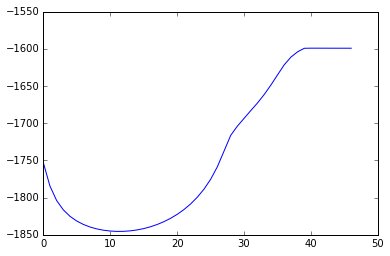

In [47]:
bg = bgmm(n_init=1, n_iter=500, n_components=6, verbose=20, init_params='kmeans',
         precision_type='diag', tol=1e-2, reg_covar=1e-4)
bg.fit(X)
plt.plot([x[3] for x in bg._log_snapshot])

34 -0.205633071615
35 -0.743123530843
36 -1.30621247397
37 -1.75538012592
38 -1.96292976133
39 -1.88242774345
40 -1.56036793545
41 -1.1008396988
42 -0.620293369542
43 -0.212389894052


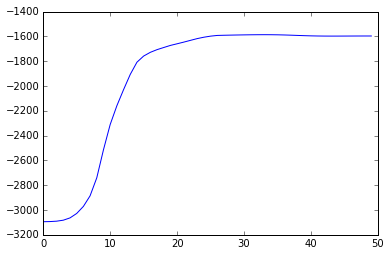

In [46]:
bg = bgmm(n_init=1, n_iter=500, n_components=6, verbose=20, init_params='random',
         precision_type='diag', tol=1e-2, reg_covar=1e-4)
bg.fit(X)
plt.plot([x[3] for x in bg._log_snapshot])

1 -87.5244955108
2 -51.9089148857
3 -30.678580863
4 -17.1396522158
5 -6.50468913347


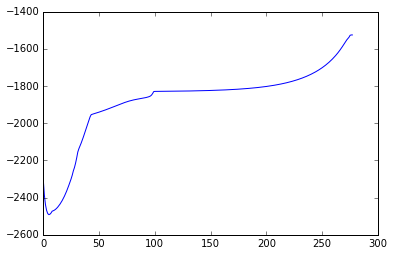

In [32]:
bg = bgmm(n_init=1, n_iter=500, n_components=10, verbose=20, init_params='kmeans',
         precision_type='tied', alpha_prior=1e-1, tol=1e-2)
bg.fit(X)
plt.plot([x[3] for x in bg._log_snapshot])

1 -0.0112516200729
2 -0.00629023629153


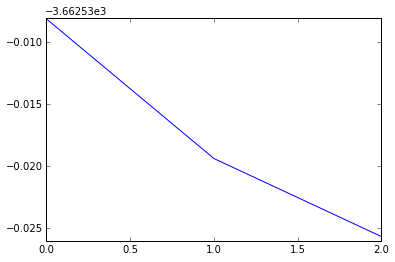

In [39]:
bg = bgmm(n_init=1, n_iter=500, n_components=10, verbose=20, init_params='random',
         precision_type='tied', alpha_prior=1e-1, tol=1e-2)
bg.fit(X)
plt.plot([x[3] for x in bg._log_snapshot])

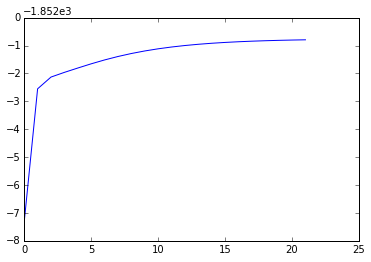

In [41]:
bg = bgmm(n_init=1, n_iter=500, n_components=6, verbose=20, init_params='kmeans',
         precision_type='spherical', alpha_prior=10, tol=1e-2)
bg.fit(X)
plt.plot([x[3] for x in bg._log_snapshot])

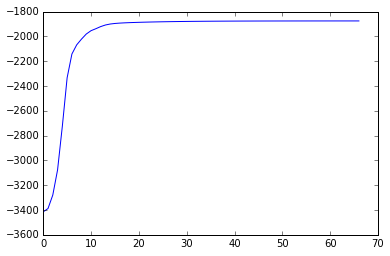

In [44]:
bg = bgmm(n_init=1, n_iter=500, n_components=6, verbose=20, init_params='random',
         precision_type='spherical', alpha_prior=10, tol=1e-2)
bg.fit(X)
plt.plot([x[3] for x in bg._log_snapshot])